# Day 2 exercises - Creating `plot_bsd`

Exercise 1. Using your function from Exercise 2 on Sheet 1, write a function which computes the **poor man's $L$-function**

$$f_E(x) = \prod_{p \leq x}\frac{N_p(E)}{p}$$

for a given elliptic curve $E/\mathbb{Q}$ and input $x \in \mathbb{R}$.

In [9]:
def PML(E,x):
    prod=1
    for p in prime_range(x):
            prod = prod*E.Np(p)/p
    return prod
E= EllipticCurve([0,2]);E
PML(E,100)
prime_range(4,5)

[]

In [21]:
import numpy
def PML_list(E,x):
    L = [1]
    prod = 1
    for p in prime_range(1,x):
        prod  = prod*E.Np(p)/p
        L.append(prod)
    return L
PML_list(E,10)


[1, 3/2, 2, 12/5, 108/35]

In [59]:
%%timeit -r 1 -n 1
PML(E,10000)

10.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Exercise 2. Create a scatter plot of $f_E(x)$ for various elliptic curves $E$. What patterns can you observe? 

In [16]:
import matplotlib.pyplot as plt


In [3]:
E1 = EllipticCurve([1,2,3,4,5])
E2 = EllipticCurve([3,4,5,6,7])
E3 = EllipticCurve([5,6,7,8,9])


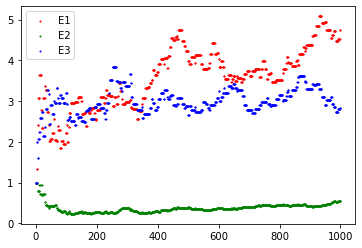

In [60]:
def scatter_plot_color(list, col ,lab):
  x = []
  y = []
  for i in list:
    x.append(i[0])
    y.append(i[1])

  plt.scatter(x,y,color = col,s=1,label = lab)

X1 = [[x,PML(E1,x)] for x in range(1000)]
X2 = [[x,PML(E2,x)] for x in range(1000)]
X3 = [[x,PML(E3,x)] for x in range(1000)]
scatter_plot_color(X1,'red','E1')
scatter_plot_color(X2,'green','E2')
scatter_plot_color(X3, 'blue','E3')
plt.legend(loc = 'upper left')
plt.show()


Exercise 3. Create a scatter plot of $\log(f_E(x))$ against $\log\log(x)$ for various elliptic curves $E$. Ensure that the plot includes other helpful user information such as the bound on $x$ used, the Elliptic curves plotted, and possibly suggestive lines of nearest fit.

1min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


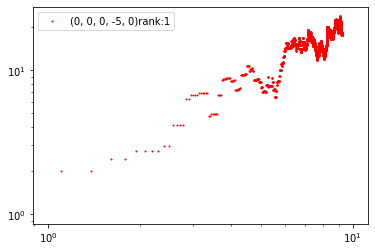

<Figure size 1440x1440 with 0 Axes>

In [23]:
%%timeit -r 1 -n 1
colour = ["red", "blue", "green", "yellow", "purple"]
def plot_bsd(ecs_list, B):
            for E in ecs_list:
                    X = [[ln(x), PML(E,x)] for x in range(B)]
                    scatter_plot_color(X,colour[ecs_list.index(E)%5],str(E.ainvs())+"rank:"+str(E.rank()))
            plt.legend(loc = 'upper left')
            plt.xscale("log")
            plt.yscale("log")
            plt.figure(figsize=(20,20))
            plt.show
                
    
E = [E1,E2,E3]
EL = [EllipticCurve([-5,0])]
plot_bsd(EL, 10000) 

    
    

3.83 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


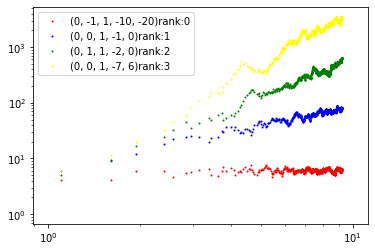

<Figure size 1440x1440 with 0 Axes>

In [28]:
%%timeit -r 1 -n 1
colour = ["red", "blue", "green", "yellow", "purple"]
def plot_bsd_faster(ecs_list,B):
    x = [0]+[log(a) for a in prime_range(B)]
    for E in ecs_list:
        y = PML_list(E,B)
        plt.scatter(x,y,color = colour[ecs_list.index(E)%5],s=1,label = str(E.ainvs())+"rank:"+str(E.rank()))
    plt.legend(loc = 'upper left')
    plt.xscale("log")
    plt.yscale("log")
    plt.figure(figsize=(20,20))
    plt.savefig('hopethisworks.png', dpi=100)
#trying to use barinders curves
B1 = EllipticCurve('11a1')
B2 = EllipticCurve('37a1')
B3 = EllipticCurve('389a1')
B4 = EllipticCurve('5077a1')
Bar = [B1, B2, B3, B4]
plot_bsd_faster(Bar, 10000)

Exercise 4. Create a `plot_bsd` function which works for a list of elliptic curves over an arbitrary number field.

In [68]:
#Poorman over fields
def PML_list_NF(E,K,x):
    L = [(1,1)]
    prod = 1
    for S in K.primes_of_bounded_norm(x):
           if  E.has_good_reduction(S):
                prod = prod*E.reduction(S).cardinality()/S.norm()
                L.append((S.norm(),prod))
    return L


def PMLNF(E,K,x):
    prod=1
    for S in K.primes_of_bounded_norm(x):
            if  E.has_good_reduction(S):
                prod = prod*E.reduction(S).cardinality()/S.norm()
    return L                
        
K.<a> = NumberField(x^2+1)
E = EllipticCurve(K,[0,5])
LOL = PML_list_NF(E,K,500)
test = [entry[1] for entry in LOL]

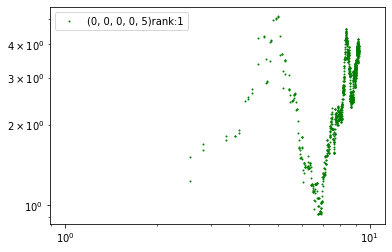

<Figure size 1440x1440 with 0 Axes>

In [73]:
def plot_bsd_NF(ecs_list,F , B):
            for E in ecs_list:
                        
                for E in ecs_list:
                        L = PML_list_NF(E,F,B)
                        x = [log(entry[0]) for entry in L]
                        y = [entry[1] for entry in L]
                        plt.scatter(x,y,color = 'green',s=1,label = str(E.ainvs())+"rank:"+str(E.rank()))
            plt.legend(loc = 'upper left')
            plt.xscale("log")
            plt.yscale("log")
            plt.figure(figsize=(20,20))
            plt.show()
            return
K.<a> = NumberField(x^2+1)
E = EllipticCurve(K,[0,5])
plot_bsd_NF([E],K,10000)

Exercise 5. Can you find an elliptic curve $E/\mathbb{Q}$, and four number fields $K_1, K_2, K_3, K_4$ for which the rank of $E(K_i)$ is different for each $i$. Create the BSD plot for these base-changed curves.

In [214]:
elliptic_curves.rank(n=5, rank=3, tors=0, labels=True)

['5077a1', '11197a1', '11642a1', '12279a1', '13766a1']

In [230]:

E = EllipticCurve('37a1')
def rootxrank(E,polylist):
    L = []
    for f in polylist:
        F.<a> = NumberField(f)
        EF = E.base_extend(F)
        L.append((f,EF.rank_bounds()))
    return L
polys = [X-1,X^2-3,X^2-31]
rootxrank(E,polys)


Interrupting PARI/GP interpreter...


KeyboardInterrupt: Ctrl-c pressed while running PARI/GP interpreter

Exercise 6. Why is the **poor man's analytic rank** (the slope of $\log(f_E(x))$ against $\log\log(x)$) equal to the actual analytic rank (order of vanishing at $s=1$ of $L(E/\mathbb{Q},s))?